## Regresion Logistica Multinomial

Hasta ahora vimos el funcionamiento interno y la utilidad que puede llegar a tener la Regresion Logistica, aunque tiene una limitante importante, la cual es que tiene un comportamiento _binario_. Lo cual no nos permite tener mas de dos clasificaciones. 

Para resolver esto, podemos utilizar la _**Regresion Logistica Multinomial**_. Para ello utilizaremos dos metodos distintos: 
1. Estrategia One-vs-Rest.
2. Softmax Regression.

### 1. One-vs-Rest.

One versus Rest (OvR), tambien llamada _One versus All_ (OvA), es una tecnica que _**extiende**_ la clasificacion binaria a problemas multi clase. En general, asi es como funciona: 

- Se entrena un clasificador por clase a calificar, donde una clase es considerada como _la clase positiva_ y el resto como la _clase negativa_.

Por ejemplo: Digamos que tenemos que resolver un problema de reconocimiento de imagenes. El dataset contiene 4 clases, los digitos 0, 1, 2 y 3. El objetivo es clasificarlos. Usando el enfoque OvR, se tendria que usar 4 clasificadores binarios:

1. Clasificador binario 1: digito 0 vs digitos 1, 2 y 3.
2. Clasificador binario 2: digito 1 vs digitos 0, 2 y 3.
3. Clasificador binario 3: digito 2 vs digitos 0, 1 y 3.
4. Clasificador binario 4: digito 3 vs digitos 0, 1 y 2.

Y la hora de querer clasificar una nueva muestra, se utilizarian cada uno de estos clasificadores. El que tenga la probabilidad mas alta sera la clase predicha.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

##### EDA (Analisis Exploratorio de Datos)

In [2]:
iris = load_iris()
print(iris.keys())

# Eligiendo columnas de interes.
columns = iris.feature_names + ['target']
print(columns)
iris_df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=columns)
iris_df.describe()
# iris_df.head(20)
# iris_df.tail(20)
# iris_df.isnull().sum()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [3]:
# Seleccionando datos de entrenamiento y prueba
# NOTA: Para este caso al ser tan pocos datos, usaremos todos para el entrenamiento.

X_train = iris_df[['petal length (cm)', 'petal width (cm)']]
Y_train = iris_df['target']

In [4]:
# Instanciando Modelo
lr_ovr =  LogisticRegression(
    solver='sag',
    max_iter=1000,
    random_state=42,
    multi_class='ovr'
)

# Ajustando modelo
lr_ovr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42,
                   solver='sag')

In [6]:
print(f"Accuracy = {lr_ovr.score(X_train, Y_train)}")

Accuracy = 0.9666666666666667


In [8]:
lr_ovr.intercept_

array([  7.80951078,  -2.21631896, -17.35898137])

In [7]:
lr_ovr.coef_

array([[-2.58531477, -1.07946479],
       [ 0.88567245, -1.5405395 ],
       [ 2.74026712,  2.38214674]])

#### Predicciones

In [9]:
lr_ovr.predict_proba(X_train[0:2])

array([[8.19091823e-01, 1.80906376e-01, 1.80108919e-06],
       [8.19091823e-01, 1.80906376e-01, 1.80108919e-06]])

In [10]:
lr_ovr.predict(X_train[0:2])

array([0., 0.])

In [13]:
predictions = lr_ovr.predict(X_train)
print(predictions)

accuracy = lr_ovr.score(X_train, Y_train)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


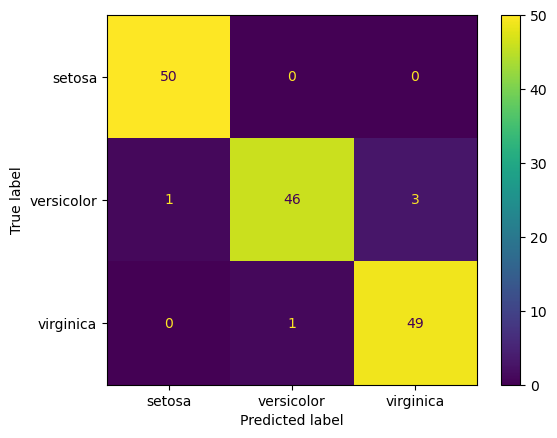

In [27]:
# Visualizacion de los resultados
cm = metrics.confusion_matrix(Y_train, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
cm_display.plot()

# plt.figure(figsize=(9,9))
# sns.heatmap(cm, 
#             annot=True,
#             fmt=".0f",
#             linewidths=.5,
#             square = True,
#             cmap = 'Blues')
# plt.ylabel('Actual label', fontsize = 17)
# plt.xlabel('Predicted label', fontsize = 17)
# plt.title(f'Accuracy Score: {accuracy:.3f}', size = 17)
# plt.tick_params(labelsize= 15)
plt.show()

Como podemos observar, nuestro modelo de _Regresion Logistica Multinomial_ erro 5 clasificaciones:
- Clasifico 1 como _setosa_ pero en realidad correspondia a _versicolor_.
- Clasifico 1 como _versicolor_ pero en realidad correspondia a _virginica_.
- Y por ultimo clasifico 3 como _virginica_ pero correspondian a _versicolor_. 

### Softmax Regression

Este metodo no entrena y combina multiples clasificadores binarios. <br>

##### Score

En lugar de eso, la Softmax Regression calcula un _score_ $\; s_{k}(\mathbf{x}) \;$ por cada clase $\; k \;$, luego estima la probabilidad de cada clase aplicando la _**softmax function**_ (tambien llamada _normalized exponential_) de los _scores_. $$ s_{k}(\mathbf{x}) = \mathbf{x}^{T} \theta^{(k)} $$

Como se puede observar, cada class tiene su propio vector de parametros dedicado $\; \mathbf{\theta}^{(k)} \;$. Todos ellos son por supuesto almacenados como filas en un _parametro matriz_ $\; \mathbf{\Theta} \;$. <br>

##### Probability

Despues de estimar el _score_ de cada clase de la instancia $\; \mathbf{x} \;$, se puede estimar la probabilidad $\; \widehat{p}_{k} \;$ de que la instancia pertenezca a la clase $\; k \;$ utilizando la _**funcion softmax**_: la cual calcula el exponencial de cada _score_, luego los normaliza (dividiendolos por la suma de todos los exponenciales). Los _scores_ tambien son llamdas _logits_ o _log-odds_ (aunque en realidad son probabilidades logisticas no normalizados). $$ \widehat{p}_{k} = \sigma(\mathbf{s}(\mathbf{x}))_{k} = \frac{e^{s_{k}(\mathbf{x})}}{\sum \limits_{j=1}^{K} e^{s_{j}(\mathbf{x})}} $$ 

Donde: 
- $\; K \;$ es el numero de clases.
- $\; \mathbf{s}(\mathbf{x}) \;$ es el vector que contiene los _scores_ de cada clase por instancia $\; \mathbf{x} \;$.
- $\; \sigma(\mathbf{s}(\mathbf{x}))_{k} \;$ es la probabilidad estimada de que la instancia $\; \mathbf{x} \;$ pertenezca a la clase $\; k \;$ dado los _scores_ de cada clase por la instancia.

Al igual que la _Regresion Logistica_, la _**Regresion Softmax**_ predice la clase con la probabilidad mas alta (que no es mas que la clase con el _score_ mas alto): 
$$ 

Softmax\; Regression\; classifier\; prediction\\

\hat{y} = \underset{k}{\operatorname{arg max}}\;\sigma(\mathbf{s}(\mathbf{x}))_{k} = \underset{k}{\operatorname{arg max}}\;s_{k}(\mathbf{x}) = \underset{k}{\operatorname{arg max}} \left(\left(\mathbf{\theta}^{(k)}\right)^{T}\mathbf{x}\right) 

$$ 

Donde:
- $\; \operatorname{arg max} \;$ retorna el valor de la variable que maximiza una funcion. En esta ecuacion, retorna el valor de $\; k \;$ que maximisa la probabilidad estimada $\; \sigma(\mathbf{s}(\mathbf{x}))_{k} \;$

**IMPORTANTE**: La _regresion Softmax_ es un clasificador que predice una sola clase a la vez. No es miltioutput, solo multiclase.

#### Training

Ahora que sabemos como el modelo estima las probabilidades y hace predicciones, toca _entrenarlo_. Ya que el objetivo es tener un modelo que estime un alta probabilidad para una clase objetivo (y como consecuencia una baja probabilidad para las otas clases). Minimizar la function de costo, llamada _**cross entropy**_, deberia conducir a este objetivo porque penaliza el modelo cuando estima una baja probabilidad para la clase objetivo. _Cross entropy_ es usada frecuentemente para medir qué tan bien un conjunto de probabilidades de clase estimadas coincide con la clase objetivo. 

$$
Cross\; entropy\; cost\; function\\
J(\mathbf{\Theta}) = -\frac{1}{m}\sum \limits_{i=1}^{m}\sum \limits_{k=1}^{K} y_{k}^{(i)}log\left(\hat{p}_{k}^{(i)}\right)

$$

Donde:
- $\; y_{k}^{(i)} \;$ es la probabilidad objetivo de que la $\; i^{(th)} \;$ (i-esima) instancia pertenezca a la clase $\; k \;$. En general, es ya sea igual a 1 o 0, dependiendo de si la instancia pertenece a la clase o no. <br>

Como se puede notar, cuando solo hay dos clases ($\; K = 2 \;$), esta _funcion de costo_ es equivalente a la _Funcion de cost de la Regresion Logistica (log loss)_. <br>

El vector gradiente de esta función de costos con respecto a $\; \mathbf{\theta}^{(k)} \;$ es: 
$$
Cross\; entropy\; gradient\; vector\; for\; class\; k\\

\nabla_{\mathbf{\theta}^{(k)}} J(\mathbf{\Theta}) = \frac{1}{m}\sum \limits_{i=1}^{m}\left(\hat{p}_{k}^{(i)} - y_{k}^{(i)} \right)\mathbf{x}^{(i)}

$$

Ahora que se puede calcular el vector gradiente para cada clase, y despues se pude usar el _**Gradient Descent**_ (o cualquier otro algoritmo de optimizacion) para encontrar la matriz de parametros $\; \mathbf{\Theta} \;$ que minimiza el costo de la función.

#### Implementando con Scikit-learn.

In [5]:
# Instanciando una Regresion Softmax
softmax_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    C=10
)

In [6]:
# Ajustando modelo
softmax_reg.fit(X_train, Y_train)

LogisticRegression(C=10, multi_class='multinomial')

In [7]:
softmax_reg.intercept_

array([ 18.87514796,   6.3844344 , -25.25958236])

In [8]:
softmax_reg.coef_

array([[-4.58614563, -2.24129385],
       [ 0.16068263, -2.15860167],
       [ 4.425463  ,  4.39989552]])

In [11]:
# Calculando la precisión
accuracy = softmax_reg.score(X_train, Y_train)
print(f"Softmax Regression accuracy = {accuracy}")

Softmax Regression accuracy = 0.96


In [12]:
# Haciendo predicciones
predictions = softmax_reg.predict(X_train)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

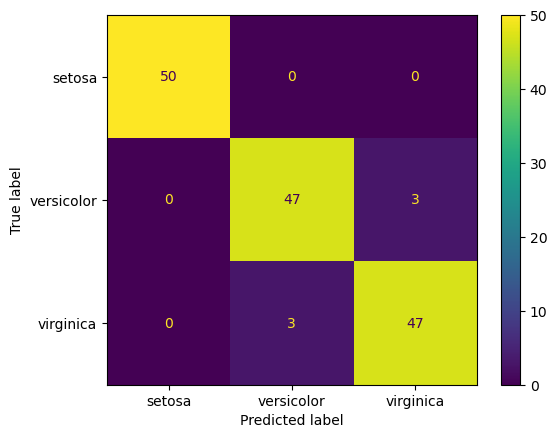

In [13]:
# Visualizacion de los resultados
cm = metrics.confusion_matrix(Y_train, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
cm_display.plot()
plt.show()

### Conclusiones
Podemos obervar que ambos modelos dan muy buenos resultados, asi que podemos optar por la opcion que mas nos parezca adecuada despues de la evaluacion de resulados.